# Table of Contents

1. Import Libraries and Data
2. Task 6.4

# 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\cmkep\Cathy\World Happiness'

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Python Exported Data', 'CF_2015_2019.csv'), index_col = False)

# Task 6.4

### Data Cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Happiness_Rank', 'Happiness_Score',
       'GDP_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Govt_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [11]:
#Derive new "Average_GDP_Capita" column for exploratory analysis

df['Average_GDP_Capita'] = df.groupby(['Country'])['GDP_Capita'].transform(np.mean)

In [12]:
df['Average_GDP_Capita'].value_counts(dropna = False)

1.472164    5
0.999923    5
1.205481    5
1.035062    5
1.204074    5
           ..
1.433627    1
0.255580    1
0.440250    1
1.360110    1
0.308000    1
Name: Average_GDP_Capita, Length: 170, dtype: int64

In [13]:
df.head(20)

Unnamed: 0  Year               Country  Happiness_Rank  Happiness_Score  \
0            0  2015           Switzerland               1            7.587   
1            1  2015               Iceland               2            7.561   
2            2  2015               Denmark               3            7.527   
3            3  2015                Norway               4            7.522   
4            4  2015                Canada               5            7.427   
5            5  2015               Finland               6            7.406   
6            6  2015           Netherlands               7            7.378   
7            7  2015                Sweden               8            7.364   
8            8  2015           New Zealand               9            7.286   
9            9  2015             Australia              10            7.284   
10          10  2015                Israel              11            7.278   
11          11  2015            Costa Rica              12            7.226   
12          12  2015               Austria              13            7.200   
13          13  2015                Mexico              14            7.187   
14          14  2015         United States              15            7.119   
15          15  2015                Brazil              16            6.983   
16          16  2015            Luxembourg              17            6.946   
17          17  2015               Ireland              18            6.940   
18          18  2015               Belgium              19            6.937   
19          19  2015  United Arab Emirates              20            6.901   

    GDP_Capita   Family  Life_Expectancy  Freedom  Generosity  \
0      1.39651  1.34951          0.94143  0.66557     0.29678   
1      1.30232  1.40223          0.94784  0.62877     0.43630   
2      1.32548  1.36058          0.87464  0.64938     0.34139   
3      1.45900  1.33095          0.88521  0.66973     0.34699   
4      1.32629  1.32261          0.90563  0.63297     0.45811   
5      1.29025  1.31826          0.88911  0.64169     0.23351   
6      1.32944  1.28017          0.89284  0.61576     0.47610   
7      1.33171  1.28907          0.91087  0.65980     0.36262   
8      1.25018  1.31967          0.90837  0.63938     0.47501   
9      1.33358  1.30923          0.93156  0.65124     0.43562   
10     1.22857  1.22393          0.91387  0.41319     0.33172   
11     0.95578  1.23788          0.86027  0.63376     0.25497   
12     1.33723  1.29704          0.89042  0.62433     0.33088   
13     1.02054  0.91451          0.81444  0.48181     0.14074   
14     1.39451  1.24711          0.86179  0.54604     0.40105   
15     0.98124  1.23287          0.69702  0.49049     0.14574   
16     1.56391  1.21963          0.91894  0.61583     0.28034   
17     1.33596  1.36948          0.89533  0.61777     0.45901   
18     1.30782  1.28566          0.89667  0.58450     0.22250   
19     1.42727  1.12575          0.80925  0.64157     0.26428   

    Govt_Corruption  Dystopia_Residual  Average_GDP_Capita  
0           0.41978            2.51738            1.472164  
1           0.14145            2.70201            1.386523  
2           0.48357            2.49204            1.396729  
3           0.36503            2.46531            1.519381  
4           0.32957            2.45176            1.388129  
5           0.41372            2.61955            1.356960  
6           0.31814            2.46570            1.411013  
7           0.43844            2.37119            1.403981  
8           0.42922            2.26425            1.317509  
9           0.35637            2.26646            1.394885  
10          0.07785            3.08854            1.303722  
11          0.10583            3.17728            1.035655  
12          0.18676            2.53320            1.398341  
13          0.21312            3.60214            1.079361  
14          0.15890            2.51011            1.455946  
15

In [14]:
df.shape

(782, 13)

In [15]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0            0
Year                  0
Country               0
Happiness_Rank        0
Happiness_Score       0
GDP_Capita            0
Family                0
Life_Expectancy       0
Freedom               0
Generosity            0
Govt_Corruption       0
Dystopia_Residual     0
Average_GDP_Capita    0
dtype: int64

In [16]:
dups = df.duplicated()

In [17]:
dups.shape # No dups

(782,)

##### "Extreme" values are assumed to be accurate. The variables thought to contribute to a country's happiness levels are only estimates and are compared to a benchmark country, Dystopia, that is assigned the lowest estimates for each variable.

C:\Users\cmkep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_GDP_Capita', ylabel='Density'>

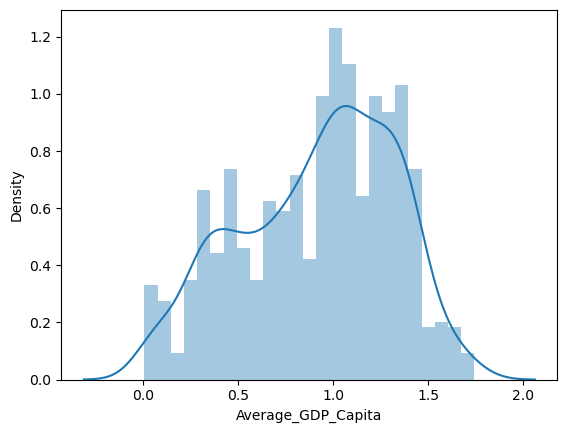

In [18]:
sns.distplot(df['Average_GDP_Capita'], bins=25) # Shows extreme values

In [19]:
df['Average_GDP_Capita'].mean() # Check the mean

0.9160474824757023

In [20]:
df['Average_GDP_Capita'].median() # Check the median

0.99034698425

In [21]:
df['Average_GDP_Capita'].max() # Check the max

1.7436911372000001

### Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

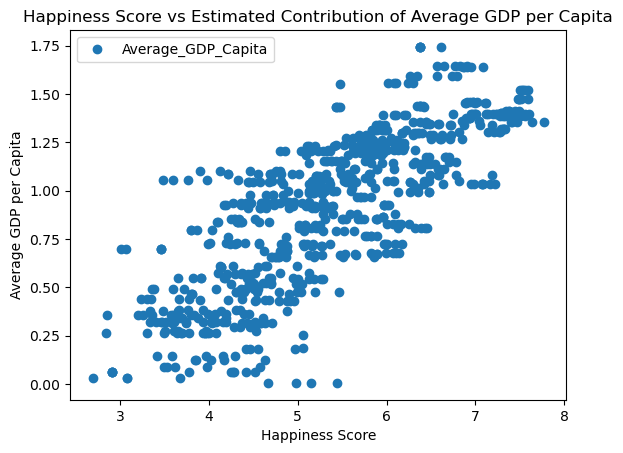

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

GDPScorescatter = df.plot(x = 'Happiness_Score', y='Average_GDP_Capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Estimated Contribution of Average GDP per Capita')  
plt.xlabel('Happiness Score')  
plt.ylabel('Average GDP per Capita')  
plt.show()

In [36]:
#save image to Visualizations folder
GDPScorescatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AVGGDP_Score_Scatter.png'))

### State your hypothesis in a markdown cell within your Jupyter notebook.

#### The higher the estimated contribution of the average GDP per Capita to a country's happiness, the higher the happiness score.

### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Happiness_Score'].values.reshape(-1,1)
y = df['Average_GDP_Capita'].values.reshape(-1,1)

In [24]:
X

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [25]:
y

array([[1.47216391],
       [1.3865226 ],
       [1.3967286 ],
       [1.51938064],
       [1.38812888],
       [1.35696039],
       [1.41101293],
       [1.40398145],
       [1.31750921],
       [1.39488499],
       [1.30372248],
       [1.03565526],
       [1.39834145],
       [1.07936076],
       [1.45594586],
       [1.03322664],
       [1.63767472],
       [1.46041533],
       [1.37539815],
       [1.64522667],
       [1.33756679],
       [1.36011   ],
       [1.05246824],
       [1.59213753],
       [1.14826769],
       [1.39534268],
       [1.17332692],
       [1.74369114],
       [1.34411669],
       [1.11103509],
       [1.26856247],
       [1.13555794],
       [0.99291046],
       [1.05001375],
       [1.43951271],
       [1.29880757],
       [1.28569997],
       [1.3553175 ],
       [1.55566249],
       [1.0461    ],
       [1.2996353 ],
       [0.8296049 ],
       [0.80661439],
       [0.72375822],
       [1.24600671],
       [1.33774504],
       [1.31455369],
       [0.927

### Split the data into two sets: a training set and a test set.

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Run a linear regression on the data.

##### Fit the model you created to the training set

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

##### Create a prediction for y on the test set.

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line on the test set.

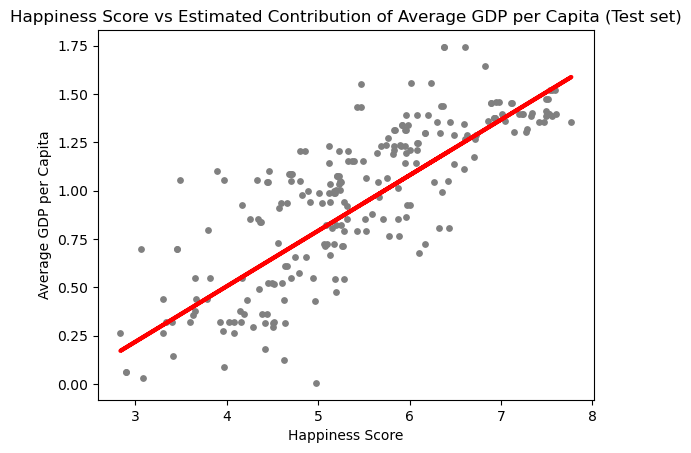

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Estimated Contribution of Average GDP per Capita (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Average GDP per Capita')
plot_test.show()

### Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### There appears to be an even dispersion of points on both sides of the line so it looks to be a strong correlation.

### Check the model performance statistics—MSE and R2.

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

# The small MSE and a R2 score closer to one makes the line a fairly good fit.

Slope: [[0.28733752]]
Mean squared error:  0.0614856394347381
R2 score:  0.6159091906785262


### Compare the predicted y values with the actual y values in a dataframe.

In [33]:
y_predicted

array([[0.94332091],
       [1.33438726],
       [1.17865028],
       [1.4013369 ],
       [0.44220424],
       [0.7039687 ],
       [0.6171928 ],
       [0.80999628],
       [1.34674277],
       [0.9326894 ],
       [1.21916491],
       [0.90424298],
       [0.31376437],
       [0.82838588],
       [0.19049657],
       [1.03239552],
       [0.55972531],
       [0.61317005],
       [0.73500118],
       [0.91602377],
       [1.18755778],
       [0.49794772],
       [0.70626743],
       [1.13698638],
       [1.25536944],
       [1.43265669],
       [1.01141988],
       [1.53954625],
       [0.40657441],
       [1.34501875],
       [1.18727044],
       [0.91602382],
       [1.03182084],
       [0.33560202],
       [1.43782877],
       [0.63615707],
       [0.24164265],
       [0.82809854],
       [1.10394259],
       [1.12807891],
       [0.65081129],
       [1.06946212],
       [1.12980294],
       [0.88786474],
       [1.46139044],
       [1.44932227],
       [0.9786634 ],
       [0.872

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0   1.065827   0.943321
1   1.455946   1.334387
2   1.439513   1.178650
3   1.455946   1.401337
4   0.439777   0.442204
5   1.088451   0.703969
6   0.360968   0.617193
7   0.723416   0.809996
8   1.375398   1.346743
9   1.152317   0.932689
10  1.135558   1.219165
11  1.151035   0.904243
12  0.322057   0.313764
13  0.941191   0.828386
14  0.062447   0.190497
15  1.314554   1.032396
16  0.360968   0.559725
17  0.839133   0.613170
18  1.204074   0.735001
19  0.791438   0.916024
20  1.743691   1.187558
21  0.089260   0.497948
22  0.548237   0.706267
23  1.390482   1.136986
24  1.743691   1.255369
25  1.394885   1.432657
26  1.274928   1.011420
27  1.396729   1.539546
28  0.376745   0.406574
29  1.375398   1.345019

### Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

#### There is an obvious positive correlation, but I did expect it to have a stronger fit than it did. 
#### The small sample size of 782 can be considered data bias. 
#### The nature of the Happiness Report itself is a source of data bias in trying to predict Happiness Scores - The score is the sum of all six variables so no one line will be a perfect fit when looking at any one variable. 
#### Depending on what methodology is used to determine each variable's estimated contribution to the happiness score, that could introduce bias as well. 

In [37]:
#export data set

df.to_csv(os.path.join(path, '02 Data','Python Exported Data', 'CF_2015_2019_2.csv'))